In [3]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl

LOAD_FROM_PICKLE = True

if LOAD_FROM_PICKLE:
    # PV power data
    df_power = pkl.load(open('pv_data.pkl', 'r'))
else:
    # Power production
    list_files = [('Interpolated-1-min-sample_October', 'data_PV_Oct_2018'),
                  ('Interpolated-1-min-sample_November', 'data_PV_Nov_2018'),
                  ('Interpolated-1min-sample_December', 'data_PV_Dec_2018'),
                  ('Interpolated-1min-sample_January', 'data_PV_Jan_2019'),
                  ('Interpolated-1min-sample_February', 'data_PV_Feb_2019')]

    mat_data = [scipy.io.loadmat('./Data consumption/{}/{}.mat'.format(folder,filename)) for folder,filename in list_files]

    df_power = None
    for i, mat in enumerate(mat_data):
        col_name = list_files[i][1]
        json_data = {'timestamp': list(mat[col_name][0,0][4].transpose()[0]),'power': list(mat[col_name][0,0][5].transpose()[0])}
        df_new = pd.DataFrame(data=json_data)
        df_new.index = pd.to_datetime(df_new.timestamp, unit='ms')
        if df_power is None:
            df_power = df_new
        else:
            df_power = pd.concat([df_power,df_new])

    df_power = df_power.resample('10T').mean()
    df_power = df_power.fillna(method='bfill')
    df_power['power'] = df_power['power'].apply(lambda x: max(x,0))
    pkl.dump(df_power, open('pv_data.pkl', 'w'))

# Environmental data
df_envdata = pkl.load(open('env_data.pkl', 'r'))

# The joint df 
df = df_power.join(df_envdata)

df['hour'] = df.index.hour
df['day'] = df.index.dayofyear
df

,power,timestamp,sun_dur,prec_rain,rh_air,glob_irr,wind_speed,temp,glob_irr_std,wind_dir,diff_irr,hour,day
timestamp,,,,,,,,,,,,,
2018-10-05 09:30:00,9069.411765,1.538732e+12,10.0,0.0,80.4,500.0,4.7,14.6,4.0,193.0,78.0,9,278
2018-10-05 09:40:00,9329.766667,1.538733e+12,10.0,0.0,79.8,516.0,4.7,14.8,7.0,199.0,84.0,9,278
2018-10-05 09:50:00,9596.793103,1.538733e+12,10.0,0.0,80.1,522.0,4.0,14.6,25.0,199.0,89.0,9,278
2018-10-05 10:00:00,9820.962963,1.538734e+12,10.0,0.0,79.4,544.0,5.0,15.0,3.0,211.0,89.0,10,278
2018-10-05 10:10:00,9990.034483,1.538734e+12,10.0,0.0,77.7,550.0,3.2,15.4,2.0,215.0,82.0,10,278
2018-10-05 10:20:00,10165.866667,1.538735e+12,10.0,0.0,77.0,553.0,4.7,15.5,4.0,213.0,79.0,10,278
2018-10-05 10:30:00,10323.772727,1.538736e+12,10.0,0.0,75.6,563.0,5.4,15.8,2.0,215.0,76.0,10,278
2018-10-05 10:40:00,10421.545455,1.538736e+12,10.0,0.0,74.7,578.0,5.0,15.9,10.0,212.0,78.0,10,278
2018-10-05 10:50:00,10529.600000,1.538737e+12,10.0,0.0,74.4,598.0,5.4,16.1,2.0,213.0,86.0,10,278


,power,timestamp,sun_dur,prec_rain,rh_air,glob_irr,wind_speed,temp,glob_irr_std,wind_dir,diff_irr,hour,day
timestamp,,,,,,,,,,,,,
2018-10-05 09:30:00,9069.411765,1.538732e+12,10.0,0.0,80.4,500.0,4.7,14.6,4.0,193.0,78.0,9,278
2018-10-05 09:40:00,9329.766667,1.538733e+12,10.0,0.0,79.8,516.0,4.7,14.8,7.0,199.0,84.0,9,278
2018-10-05 09:50:00,9596.793103,1.538733e+12,10.0,0.0,80.1,522.0,4.0,14.6,25.0,199.0,89.0,9,278
2018-10-05 10:00:00,9820.962963,1.538734e+12,10.0,0.0,79.4,544.0,5.0,15.0,3.0,211.0,89.0,10,278
2018-10-05 10:10:00,9990.034483,1.538734e+12,10.0,0.0,77.7,550.0,3.2,15.4,2.0,215.0,82.0,10,278
2018-10-05 10:20:00,10165.866667,1.538735e+12,10.0,0.0,77.0,553.0,4.7,15.5,4.0,213.0,79.0,10,278
2018-10-05 10:30:00,10323.772727,1.538736e+12,10.0,0.0,75.6,563.0,5.4,15.8,2.0,215.0,76.0,10,278
2018-10-05 10:40:00,10421.545455,1.538736e+12,10.0,0.0,74.7,578.0,5.0,15.9,10.0,212.0,78.0,10,278
2018-10-05 10:50:00,10529.600000,1.538737e+12,10.0,0.0,74.4,598.0,5.4,16.1,2.0,213.0,86.0,10,278


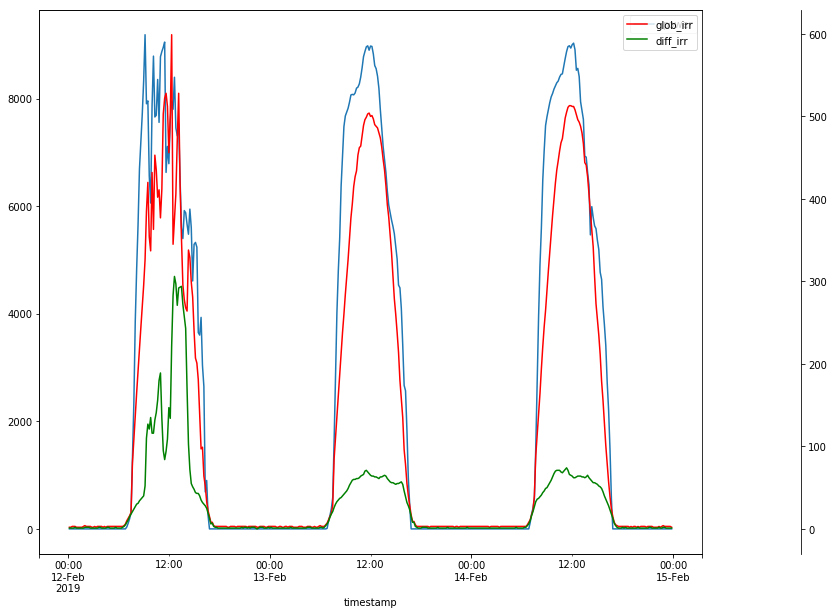

In [11]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)

mask = df_power.index < "2019-02-15"
mask &= df_power.index > "2019-02-12"
df_power[mask].plot(y='power', figsize=(16, 10), ax=ax)

mask = df_envdata.index < "2019-02-15"
mask &= df_envdata.index > "2019-02-12"
df_envdata[mask][['glob_irr','diff_irr']].plot(color=['red', 'green'], figsize=(16, 10), ax=ax2)

# df_envdata[mask][['temp']].plot(color=['black'], figsize=(16, 10), ax=ax, secondary_y=True)

# Artificial Neural Network

In [12]:
import numpy as np
import tensorflow as tf
np.random.seed(1)

In [13]:
from sklearn.neural_network import MLPRegressor

# features_of_interest = ['diff_irr','glob_irr', 'temp', 'prec_rain', 'sun_dur']
features_of_interest = ['hour','glob_irr', 'temp']

m_layers = 3
n_features = len(features_of_interest)
v = m_layers * [n_features]

X = df[features_of_interest]
Y = df['power']

ann_predictor = MLPRegressor(hidden_layer_sizes=(v))


In [14]:
# Re-scale of the data and split the dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,Y)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
ann_predictor.fit(X_train,y_train)

predictions = ann_predictor.predict(X_test)

print "Score r2 MLP: {}".format(ann_predictor.score(X_test, y_test))
print "RMSE: {}%".format(mean_squared_error(y_test, predictions)/sum(y_test))

Score r2 MLP: 0.627909592666
RMSE: 0.292169999706%


In [15]:
# ---- Timeseries example
from sklearn.preprocessing import StandardScaler

# Train over the last data
test_start_date = "2019-02-10"
test_end_date = "2019-02-15"
mask_train = df.index < test_start_date
mask_train &= df.index >= "2019-01-01"

mask_horizon = df.index >= test_start_date
mask_horizon &= df.index < test_end_date

df_train = df[mask_train]
X_train = df_train[features_of_interest]
y_train = df_train['power']

# Predict tomorrow
df_horizon = df[mask_horizon]
X_test = df_horizon[features_of_interest]


In [16]:
# ---- ANN

# Train on past values
ann_predictor = MLPRegressor(hidden_layer_sizes=(v))
ann_predictor.fit(X_train,y_train)
prediction_ann = ann_predictor.predict(X_test)

df_horizon['pred_power_ann'] = prediction_ann



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


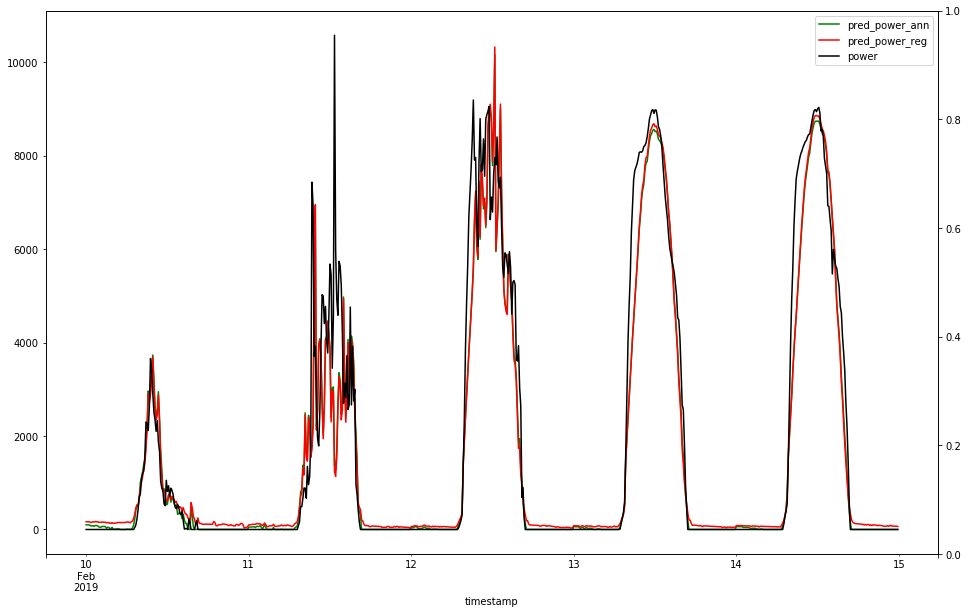

In [20]:
# ---- Linear Regression

from sklearn.linear_model import LinearRegression
# Train on past values
lr_predictor = LinearRegression().fit(X_train,y_train)
prediction_reg = lr_predictor.predict(X_test)

df_horizon['pred_power_reg'] = prediction_reg

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
ax2 = ax.twinx()

df_horizon.plot(y = ['pred_power_ann', 'pred_power_reg', 'power'], color=['g','r', 'k'], ax=ax)  # 'pred_power_reg',
# df_horizon['glob_irr'].plot(style='b--', ax=ax2)

In [21]:
lr_predictor.coef_

array([-1.67432444, 17.13074617, 15.65618547])

,hour,glob_irr,temp
timestamp,,,
2019-01-01 00:00:00,0,3.0,5.8
2019-01-01 00:10:00,0,3.0,5.7
2019-01-01 00:20:00,0,3.0,5.7
2019-01-01 00:30:00,0,2.0,5.8
2019-01-01 00:40:00,0,2.0,5.7
2019-01-01 00:50:00,0,3.0,5.7
2019-01-01 01:00:00,1,2.0,5.6
2019-01-01 01:10:00,1,3.0,5.7
2019-01-01 01:20:00,1,3.0,5.7


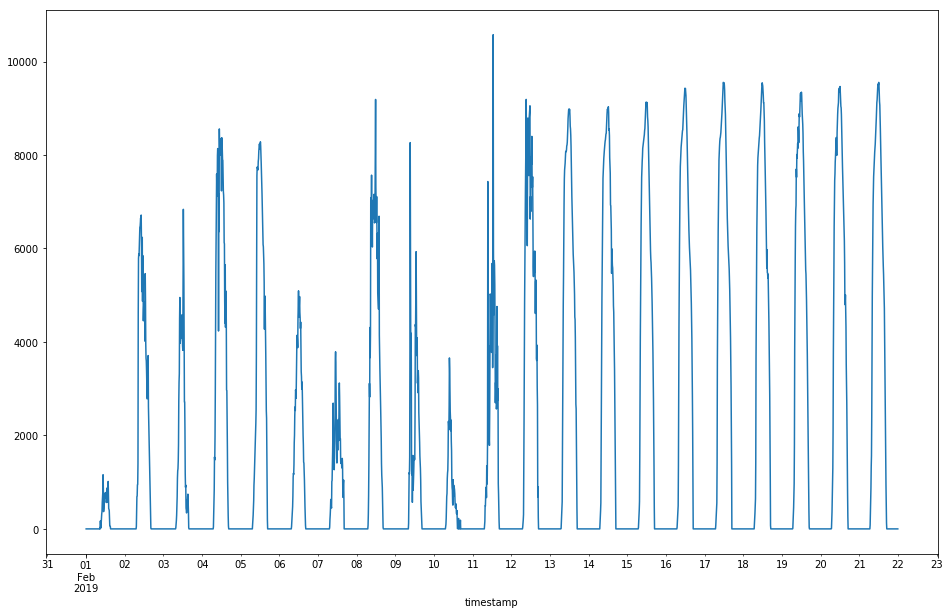

In [393]:
mask_plot = df.index >= "2018-02-01"
mask_plot &= df.index < "2018-02-22"

df[mask_plot]['power'].plot(figsize=(16, 10))